In [1]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/00


In [2]:
#Get theta effective mixing for a given top polarization hypothesis
#The result also depends on the stop, top and chi0 mass hypotheses
#Also valid for an off-shell scenario

def GetThetaMixingangle(topPol, m_stop, m_top, m_chi0) :
      p_chi0 = np.sqrt( pow(m_top*m_top + m_chi0*m_chi0 - m_stop*m_stop,2)/4 - pow(m_top*m_chi0,2) ) / m_stop
      e_chi0 = np.sqrt( p_chi0*p_chi0 + m_chi0*m_chi0 )
      sqrPol = 0
        
      if (abs(topPol) < 1) :
         sqrPol      =  np.sqrt(1 - topPol*topPol)

      tanThetaEff = ( p_chi0*sqrPol - m_chi0*topPol) / (topPol*e_chi0 + p_chi0)
      return np.arctan(tanThetaEff)

def GetWeight(thetaMixingTarget, top_arr, lep_arr, chi0_arr, m_top, m_chi0) :

    weight      = 1
    TOPMASS_REF = 175

    for i in range(2) :
        cX        = np.cos(thetaMixingTarget)
        sX        = np.sin(thetaMixingTarget)
        
        coeffTop  = 2*sX*sX*(chi0_arr[i] * top_arr[i]) + 2*sX*cX *(m_chi0 * TOPMASS_REF)
        coeffChi  = pow(cX*TOPMASS_REF, 2) - pow(sX*m_top, 2)
        
        coeffNorm = (chi0_arr[i] * top_arr[i]) * (sX*sX + cX*cX*pow(TOPMASS_REF/m_top, 2)) + 2*sX*cX*( m_chi0*TOPMASS_REF )
        weight   *= (coeffTop* (lep_arr[i] * top_arr[i]) + coeffChi*(lep_arr[i] * chi0_arr[i])) / (coeffNorm*(lep_arr[i] * top_arr[i]))

    return weight

In [3]:
fileptr = uproot.open('Mstop_175_mchi_7_5.root')['Step8']

In [4]:
pid = fileptr['genpart_pid'].array()
pt  = fileptr['genpart_pt'].array()
phi = fileptr['genpart_phi'].array()
eta = fileptr['genpart_eta'].array()
mass = fileptr['genpart_mass'].array()
llbar_dphi  = fileptr['llbar_dphi_arr'].array()
llbar_deta  = fileptr['llbar_deta_arr'].array()

In [5]:
weight = []
for i in range(len(pid)) :
    
    top_arr  = []
    chi0_arr = []
    ferm_arr = []

    for j in range(len(pid[i]) - 1) :
    
        if (abs(pid[i][j]) == 1000006) :
            mstop = mass[i][j]
        
        if (abs(pid[i][j]) == 6) :
            mtop  = mass[i][j]
            top4  = ROOT.TLorentzVector()
            top4.SetPtEtaPhiM(pt[i][j], eta[i][j], phi[i][j], mass[i][j])
            top_arr.append(top4)
        
        if (abs(pid[i][j]) == 1000022) :
            mchi0  = mass[i][j]
            chi04  = ROOT.TLorentzVector()
            chi04.SetPtEtaPhiM(pt[i][j], eta[i][j], phi[i][j], mass[i][j])
            chi0_arr.append(chi04)

        if ( (abs(pid[i][j]) == 13) or (abs(pid[i][j]) == 11) or (abs(pid[i][j]) == 15)) :
            ferm4  = ROOT.TLorentzVector()
            ferm4.SetPtEtaPhiM(pt[i][j], eta[i][j], phi[i][j], mass[i][j])
            ferm_arr.append(ferm4)
    
        else : continue
            
    thetaMixingTarget = GetThetaMixingangle(+1, mstop, mtop, mchi0)
    weight.append(GetWeight(thetaMixingTarget, top_arr, ferm_arr, chi0_arr, mtop, mchi0))

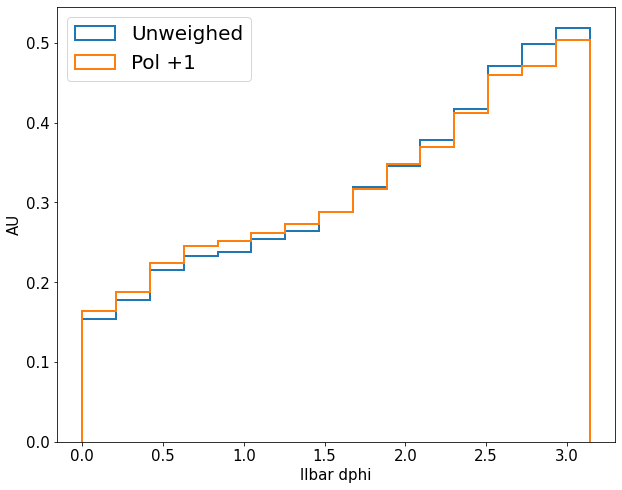

In [7]:
fig, ax  = plt.subplots(figsize=(10,8))
ax.hist(llbar_dphi, density=True, histtype='step', label='Unweighed', bins=15,  linewidth=2)
ax.hist(llbar_dphi, density=True, histtype='step', weights=weight, label='Pol +1', bins=15 ,  linewidth=2)
ax.legend(fontsize=20, loc='upper left')
ax.set_xlabel('llbar dphi', fontsize=15)
ax.set_ylabel('AU', fontsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)

In [8]:
np.savetxt('SUSY_weights_mstop_175_mchi_7_5_Pol_plus1.txt', weight)

In [28]:
np.loadtxt('SUSY_weights_Pol_minus1.txt')

array([1.58437353, 1.1011933 , 1.62446362, ..., 1.57391986, 1.54733173,
       1.51218787])

In [ ]:
fig, ax  = plt.subplots(figsize=(10,8))
ax.hist(weight, density=True, histtype='step', bins=30)
ax.set_xlabel('Weight', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlim(0,2.5)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)

In [28]:
stop4 = ROOT.TLorentzVector()
top4  = ROOT.TLorentzVector()
ferm4 = ROOT.TLorentzVector()
chi04 = ROOT.TLorentzVector()

In [29]:
stop4.SetPtEtaPhiM(pt[1][2] , eta[1][2] , phi[1][2] , mass[1][2])
top4.SetPtEtaPhiM(pt[1][26] , eta[1][26], phi[1][26], mass[1][26])
ferm4.SetPtEtaPhiM(pt[1][46], eta[1][46], phi[1][46], mass[1][46])
chi04.SetPtEtaPhiM(pt[1][44], eta[1][44], phi[1][44], mass[1][44])

In [18]:
betaV = ROOT.TVector3(-stop4.Px()/stop4.Energy(),-stop4.Py()/stop4.Energy(),-stop4.Pz()/stop4.Energy())

In [30]:
top4.Boost(betaV)
ferm4.Boost(betaV)
chi04.Boost(betaV)

In [20]:
costh = (top4.Px()*ferm4.Px()+top4.Py()*ferm4.Py()+top4.Pz()*ferm4.Pz())/top4.P()/ferm4.P()

In [40]:
referenceTopPolarization = -1 
requestedTopPolarization = topPolarization

weight_L = (top4.Energy()+top4.P())*(1-costh)
weight_R = (top4.Energy()-top4.P())*(1+costh)
weight   = ((1 + requestedTopPolarization)*weight_R + (1 - requestedTopPolarization)*weight_L)/((1 + referenceTopPolarization)*weight_R + (1 - referenceTopPolarization)*weight_L)

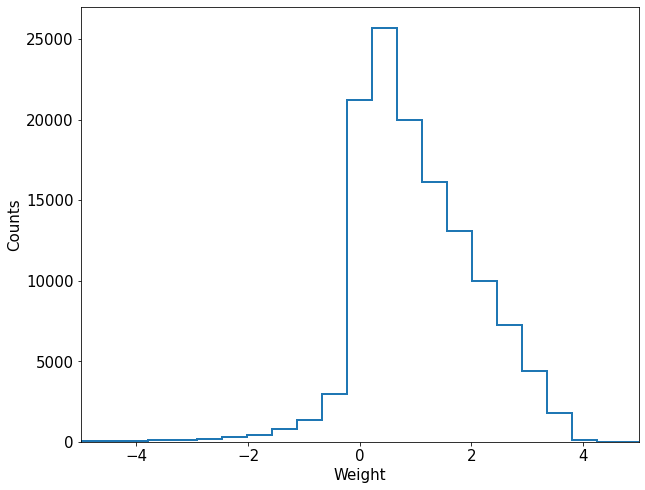

In [13]:
fig,ax = plt.subplots(figsize=(10,8))
ax.hist(weight, histtype = 'step', bins=50,  linewidth=2)
ax.set_xlabel('Weight', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlim(-5,5)
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)

In [20]:
weight  = np.array(weight)
len(weight)

125939

In [38]:
thetaMixingTarget = GetThetaMixingangle(-1, 175, 172.5, 1)
topPolarization   = chi04.P() * np.cos(2*thetaMixingTarget) / (chi04.Energy() + chi04.M()* np.sin(2*thetaMixingTarget))

In [19]:
Ecom = []
for i in range(len(mass)) :
    # Stops
    stop     = ROOT.TLorentzVector()
    stop.SetPtEtaPhiM(pt[i][2], eta[i][2], phi[i][2], mass[i][2])
        
    #Anti-stops
    antistop = ROOT.TLorentzVector()
    antistop.SetPtEtaPhiM(pt[i][3], eta[i][3], phi[i][3], mass[i][3])
        
    # COM energy
    com = stop + antistop  # Adding the 4 vectors
    Ecom.append(com.E())

In [21]:
tt_fileptr = uproot.open('ttbar_no_iso.root')['Step8']
tt_pid  = tt_fileptr['genpart_pid'].array()
tt_pt   = tt_fileptr['genpart_pt'].array()
tt_phi  = tt_fileptr['genpart_phi'].array()
tt_eta  = tt_fileptr['genpart_eta'].array()
tt_mass = tt_fileptr['genpart_mass'].array()

In [24]:
tt_Ecom = []
for i in range(len(mass)) :
    # Stops
    top     = ROOT.TLorentzVector()
    top.SetPtEtaPhiM(tt_pt[i][2], tt_eta[i][2], tt_phi[i][2], tt_mass[i][2])
        
    #Anti-stops
    antitop = ROOT.TLorentzVector()
    antitop.SetPtEtaPhiM(tt_pt[i][3], tt_eta[i][3], tt_phi[i][3], tt_mass[i][3])
        
    # COM energy
    com = top + antitop  # Adding the 4 vectors
    tt_Ecom.append(com.E())

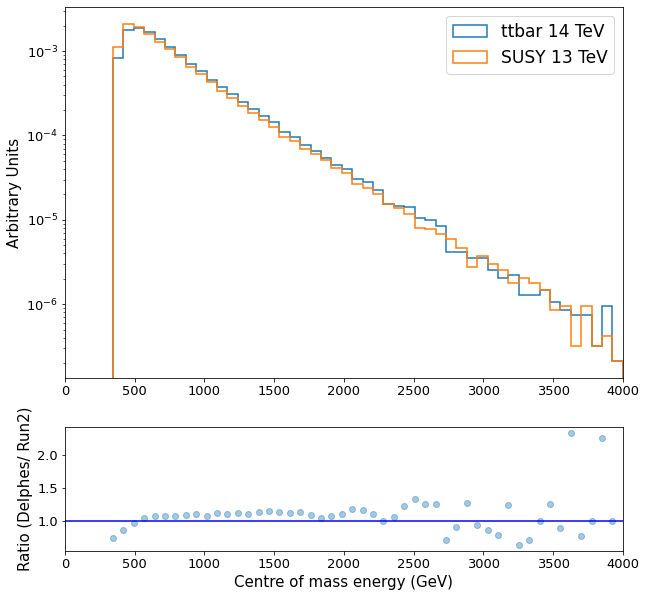

In [34]:
bins = np.linspace(345,4000, 50)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2)      = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(tt_Ecom, density=True, histtype='step', bins=bins , label='ttbar 14 TeV', linewidth=1.5)
ns2, bins2, patches  = ax1.hist(Ecom   , density=True, histtype='step', bins=bins , label='SUSY 13 TeV', linewidth=1.5)

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, 4000)

ax2.scatter(bins[:-1],     # this is what makes it comparable
            ns1 / ns2,         # maybe check for div-by-zero!
            alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax1.set_yscale('log')
ax2.set_ylabel('Ratio (Delphes/ Run2)', fontsize=15)
ax2.set_xlabel('Centre of mass energy (GeV)', fontsize=15)
ax2.set_xlim(0,4000)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [71]:
x_lim =3500

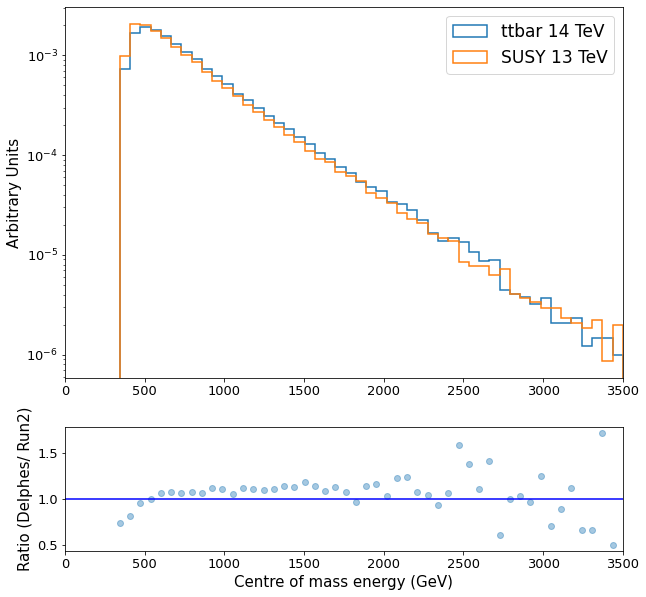

In [109]:
bins = np.linspace(345,x_lim, 50)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2)      = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(tt_Ecom, density=True, histtype='step', bins=bins , label='ttbar 14 TeV', linewidth=1.5)
ns2, bins2, patches  = ax1.hist(Ecom   , density=True, histtype='step', bins=bins , label='SUSY 13 TeV', linewidth=1.5)

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, x_lim)

ax2.scatter(bins[:-1],     # this is what makes it comparable
            ns1 / ns2,         # maybe check for div-by-zero!
            alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax1.set_yscale('log')
ax2.set_ylabel('Ratio (Delphes/ Run2)', fontsize=15)
ax2.set_xlabel('Centre of mass energy (GeV)', fontsize=15)
ax2.set_xlim(0,x_lim)
#ax2.set_xlim(0.5,1.5)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [73]:
reweigh = ns1/ns2

In [102]:
rw = []
count = 0
for i in range (len(Ecom)) :
    for j in range (len(bins) - 1):
        if (Ecom[i] > bins[j]) and (Ecom[i] < bins[j+1]) :
            rw.append(reweigh[j])
            
    if (Ecom[i] < 350):
        rw.append(1.)
            
    if (Ecom[i] > 3500):
        rw.append(1.)
        count +=1

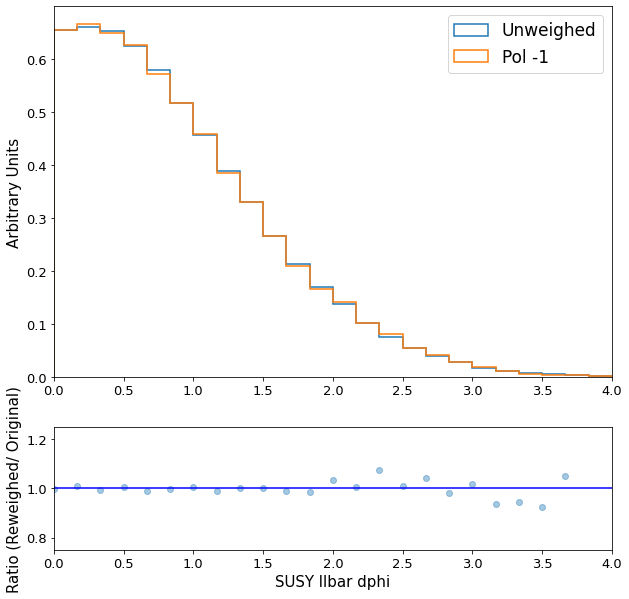

In [134]:
x_low    =  0
x_high   =  4

binning = np.linspace(x_low,x_high, 25)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(llbar_deta, density=True, histtype='step', bins=binning, label='Unweighed', linewidth=1.5)
ns2, bins2, patches  = ax1.hist(llbar_deta, density=True, histtype='step', bins=binning, label='Pol -1 '  , linewidth=1.5, weights=w)
#ns3, bins2, patches  = ax1.hist(llbar_deta, density=True, histtype='step', bins=binning, label='Pol -1 Ecom Adjusted'  , linewidth=1.5, weights=w*rw)

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(x_low,x_high)
ax2.scatter(binning[:-1],     # this is what makes it comparable
        ns2 / ns1,            # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Reweighed/ Original)', fontsize=15)
ax2.set_xlabel('SUSY llbar dphi', fontsize=15)
ax2.set_ylim(0.75,1.25)
ax2.set_xlim(x_low,x_high)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()